# Часть В. График и база данных обмена анекдотов.

## Проблема проекта, описанная при помощи красивой визуализации

## 1. Темой самых популярных анекдотов оказалась политика.

In [1]:
import sqlite3

In [2]:
just_texts_query = """
SELECT anecs.lemtext FROM anecs
"""

In [3]:
conn = sqlite3.connect("le_petit_db_save_me.db")
cur = conn.cursor()
cur.execute(just_texts_query, )
information = cur.fetchall()
information[0]

('впервые 28 год депутат приходиться жить лечиться учить свой ребенок условие который весь год создавать',)

In [7]:
plain_text = ""
for i in information:
    plain_text += i[0]

In [4]:
import wordcloud

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np

In [17]:
cat_mask = np.array(Image.open('catmask.jpg'))

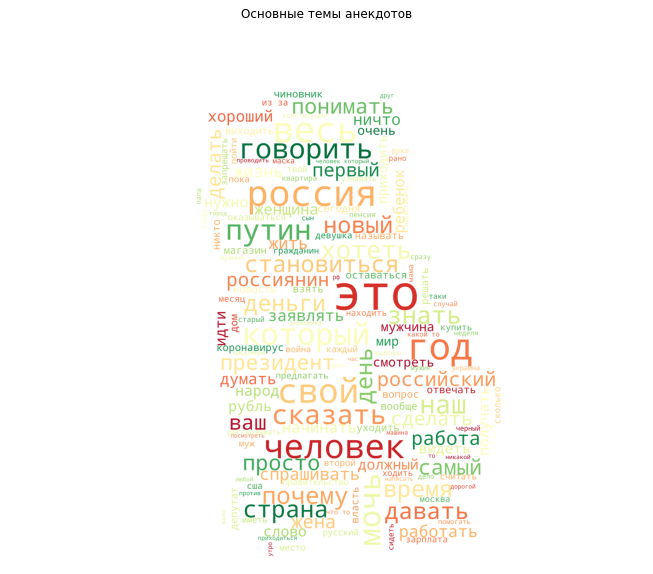

In [59]:
def cat_wordcloud(data, title, mask=None):
    cloud = WordCloud(scale=3,
                      max_words=150,
                      colormap='RdYlGn',
                      mask=mask,
                      background_color='white',
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(15,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
cat_wordcloud(plain_text, 'Основные темы анекдотов', mask=cat_mask)

## 2. Вторая база данных.

In [28]:
c20_mask = np.array(Image.open('1mask.jpg'))

In [33]:
conn = sqlite3.connect('folk.db')
cur = conn.cursor()

In [34]:
cur.execute("""
CREATE TABLE IF NOT EXISTS anecs 
(id INTEGER PRIMARY KEY AUTOINCREMENT, text text, grade int, plus int, minus int)
""")

conn.commit()
conn.close()

In [55]:
text = ("Штирлиц почуял за собой «хвост». — Мутирую, — подумал Штирлиц.",)
type(text)

tuple

In [56]:
conn = sqlite3.connect('folk.db')
cur = conn.cursor()
cur.execute(
                """
                INSERT INTO anecs 
                    (text)
                    VALUES (?)
                """, (
                    text)
            )
conn.commit()
conn.close()

In [57]:
conn = sqlite3.connect('folk.db')
cur = conn.cursor()
cur.execute(
                """
                UPDATE anecs 
                SET grade = 5000
                WHERE id = 5
                """,
            )
conn.commit()
conn.close()